In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
data = pd.read_csv('blogs.csv')

In [3]:
data.head()

Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [6]:
print(data.columns)

Index(['Data', 'Labels'], dtype='object')


In [5]:
# Plot the distribution of categories
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Labels', order=data['Labels'].value_counts().index)
plt.title('Distribution of Blog Categories')
plt.show()

In [9]:
import re

In [10]:
# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [11]:
# Apply preprocessing
data['Cleaned_Data'] = data['Data'].apply(preprocess_text)

In [12]:
# Display the first few rows of the cleaned data
print(data[['Data', 'Cleaned_Data']].head())

                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism\npath cantaloupesrvcscmu...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  


In [13]:
# Generate a word cloud for the cleaned data
all_words = ' '.join(data['Cleaned_Data'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

In [14]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Blog Posts')
plt.show()

In [16]:
# Define the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

In [17]:
# Fit and transform the 'Data' column
X_tfidf = vectorizer.fit_transform(data['Data'])

In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['Labels'], test_size=0.2, random_state=42)

In [19]:
# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

In [20]:
# Train the classifier
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [21]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [22]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=data['Labels'].unique())


In [23]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7825
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.60      0.83      0.70        18
           comp.graphics       0.72      0.72      0.72        18
 comp.os.ms-windows.misc       0.75      0.95      0.84        22
comp.sys.ibm.pc.hardware       0.72      0.84      0.78        25
   comp.sys.mac.hardware       0.88      0.67      0.76        21
          comp.windows.x       1.00      0.24      0.39        25
            misc.forsale       0.74      0.78      0.76        18
               rec.autos       0.77      0.94      0.85        18
         rec.motorcycles       0.87      0.81      0.84        16
      rec.sport.baseball       0.83      0.83      0.83        18
        rec.sport.hockey       0.65      1.00      0.79        15
               sci.crypt       0.70      1.00      0.83        19
         sci.electronics       0.69      0.56      0.62        16
                 sci.med       0.83

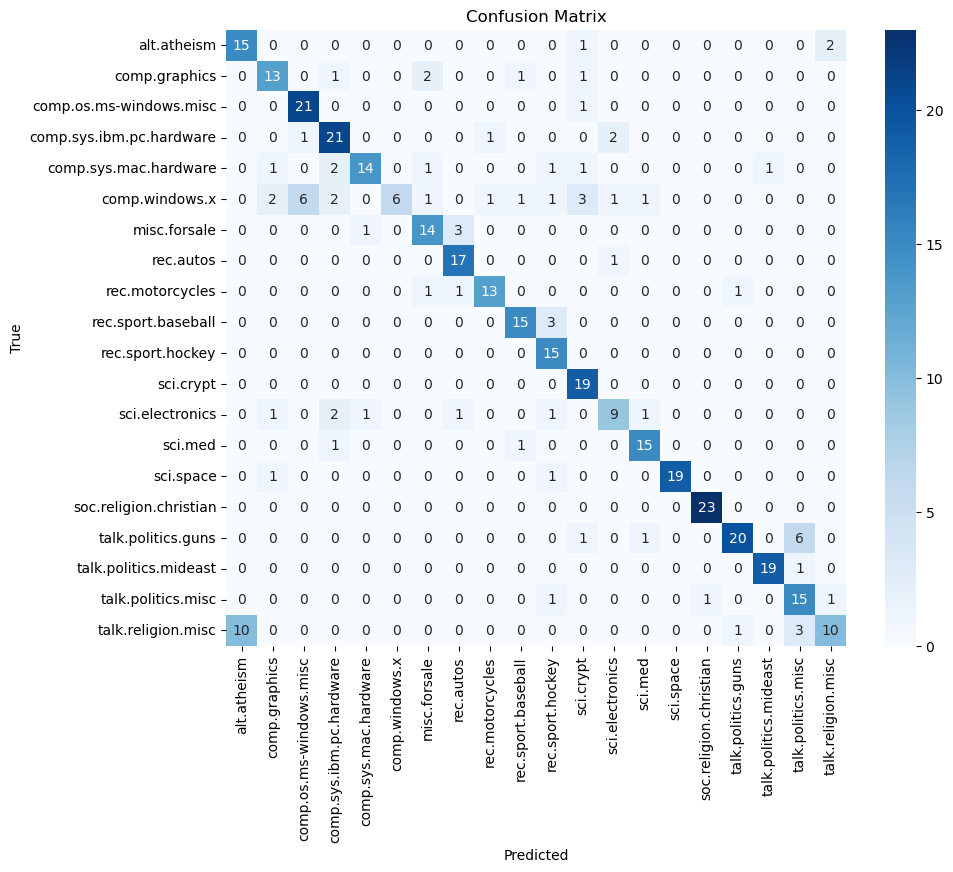

In [26]:
# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=data['Labels'].unique(), yticklabels=data['Labels'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [31]:
from textblob import TextBlob

# Function to get the sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

In [32]:
# Apply sentiment analysis
data['Sentiment'] = data['Cleaned_Data'].apply(get_sentiment)

  Obtaining dependency information for TextBlob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 660.6 kB/s eta 0:00:01
   ------- -------------------------------- 112.6/626.3 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 481.3/626.3 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.6 MB/s eta 0:00:00


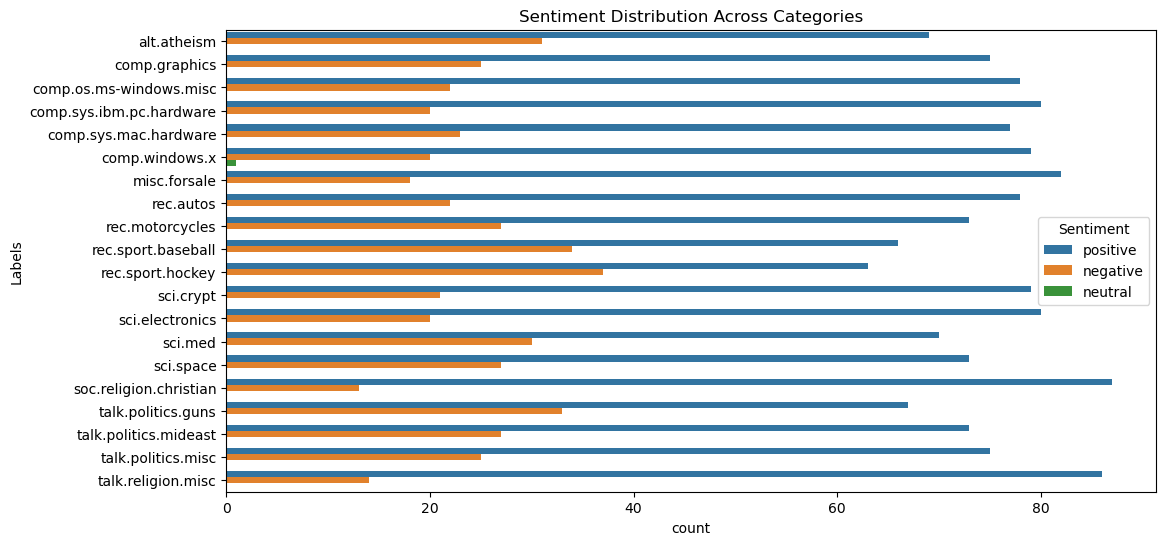

In [33]:
# Plot the distribution of sentiments
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Labels', hue='Sentiment')
plt.title('Sentiment Distribution Across Categories')
plt.show()

In [34]:
# Display sentiment analysis results
sentiment_counts = data['Sentiment'].value_counts()
print('Sentiment Counts:')
print(sentiment_counts)

Sentiment Counts:
positive    1510
negative     489
neutral        1
Name: Sentiment, dtype: int64
